# KNN and Naive Bayes
© Explore Data Science Academy

## Learning Objectives

In this train you will learn how to:

- Understand how to train and implement Naive Bayes Classifiers;
- Understand how the Log Loss function works and how it differs from other classification metrics; and
- Understand how to train and implement K-Nearest Neighbours.

## Outline

This train is structured as follows:

- Naive Bayes Classifier
- K Nearest Neighbors

## Naive Bayes

**Note: The following section is conceptually deep and is provided for comprehensiveness. The theory will not be examined in your tests. If you feel uncomfortable at any point in following along with the explanations provided, you're welcome to jump over to the coding sections. You can always return later when you feel like you're ready for a challenge.**

--- 

Naive Bayes is a classification algorithm that uses the principle of [Bayes theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem) to make classifications. The benefits of Naive Bayes are that the model is simple to build and is useful on large data sets. Further, the model makes an explicit assumption that the features are independent given the class label. What does this mean? Well first let's consider the concept of independence. Independence is a concept from probability theory and it implies that if we have two random variables $X$ and $Y$, then

$$
P(X \cap Y) = P(X)P(Y)
$$

This is where the qualifier "Naive" in "Naive Bayes" comes from. The assumption is Naive because it often does not hold. The assumption of independence implies that the model assumes that there is zero correlation among the features. Hence, the joint probability distribution $P(X, Y)$ can be obtained from the marginal probability distributions $P(X)$ and $P(Y)$ simply by multiplication. We will use the above independence assumption, conditional probability rules, and Bayes theorem to develop some theory for how the Naive Bayes model works.


Next, let's consider Bayes' theorem. Bayes' theorem is an important result in statistics and it allows us to obtain a posterior distribution given a prior distribution and a likelihood. Now that is a mouthful, but don't worry, we will walk you through it. First, let's denote class labels using $K = 1, \cdots, k$ - seem familiar? What we are trying to say here is that each class label corresponds to a number between $1$ and $k$. So, given this, the independence assumption conditional on the class label is denoted

$$
P(X_{1} \cap X_{2} \mid K = k) = P(X_{1} \mid K = k)P(X_{2} \mid K = k)
$$

In the expression above $X_{1}$ and $X_{2}$ denote random predictor variables. Keep this in mind. Bayes' theorem states that

$$
P(K = k \mid X) = \frac{P(X \mid K= k) P(K = k)}{P(X)}
$$

In the expression above:

- $P(K = k \mid X)$ is called the _posterior probability_ distribution,

- $P(K = k)$ is the *prior*, and

- $P(X \mid K= k)$ is the _likelihood_.

The posterior tells us what the probability is of the class being $k$ given a particular observation. The prior is basically a measure of how likely we think it is for any observation to be assigned to a particular class before we have observed any observations. The likelihood gives us a measure of what the data says about the probability that the observation belongs to class $k$.

That's it. In principle, this is how the Naive Bayes model works (i.e.: with two predictor variables and $k$ classes). Here's the general algorithm:

1. For each class $k$ do:

    - Find the likelihood $P(X_{1} \cap X_{2} \mid K = k) = P(X_{1} \mid K = k)P(X_{2} \mid K = k)$, using only the observations where the class is $k$ in the data. 
    - Compute a prior probability for the current class $k$ = $\frac{observations \space in \space class \space k}{total \space number \space of \space observations}$. 
    - Use Bayes' theorem, with a denominator (i.e.: the evidence $P(X)$) of $1$, to compute the posterior probability distribution.
    
    
2. At test time, observations are assigned to classes with the highest posterior probability $P(X_{1} \cap X_{2} \mid K = k)$.


Now that we've covered the intuition, let's generalise the model to include an arbitrary number of random predictor variables instead of 2, i.e.:

$$
X_{1}, \cdots, X_{p}
$$

In this case

$$
P(K = k \mid X_{1} \cap X_{2} \cdots \cap X_{p}) = \frac{P(X_{1} \cap X_{2} \cdots \cap X_{p} \mid K= k) P(K = k)}{P(X)}
$$

Now remember the assumption in the back of your mind. This allows us to simplify the expression above to become

$$
P(K = k \mid X_{1} \cap X_{2} \cdots \cap X_{p}) = \frac{P(X_{1}\mid K= k) P(X_{2}\mid K= k) \cdots P(X_{p}\mid K= k) P(K = k)}{P(X)}
$$

A special mathematical symbol allows us to represent the product $P(X_{1}\mid K= k) P(X_{2}\mid K= k) \cdots P(X_{p}\mid K= k)$ as $\prod_{i = 1}^{p} P(X_{i}\mid K= k)$. Hence, the expression above becomes


$$
P(K = k \mid X_{1} \cap X_{2} \cdots \cap X_{p}) = \frac{\prod_{i = 1}^{p} P(X_{i}\mid K= k)P(K = k)}{P(X)}
$$

Now let's consider how the Bayes classifier assigns observations to a particular class. One method, called [maximum a posteriori (MAP)](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation), maximises $P(K = k \mid X_{1} \cap X_{2} \cdots \cap X_{p})$ for $K = 1, \cdots, k$ to assign the observation to the correct class. Let's consider what this means for $K = 2$. In this case we calculate

$$
P(K = 1 \mid X_{1} \cap X_{2} \cdots \cap X_{p}) \\
P(K = 2 \mid X_{1} \cap X_{2} \cdots \cap X_{p}) \\
$$

If $P(K = 1 \mid X_{1} \cap X_{2} \cdots \cap X_{p}) > P(K = 2 \mid X_{1} \cap X_{2} \cdots \cap X_{p})$ then we say that the observation $\underline{X}$ is assigned to class $1$ else it is assigned to class $2$. This concept can be generalised to more classes. We just want to make something clear here.


An observation i.e.: something that actually happened, is denoted

$$
\underline{x}_{i} = (x_{i,1}, x_{i,2}, \cdots, x_{i,p})
$$

But a set of random variables, which captures all possible things that can happen for all observations, is denoted

$$
\underline{X} = (X_{1}, X_{2}, \cdots, X_{p})
$$

Using this notation, $X_{i}, i = 1 \cdots, p$ denotes a feature. Let's get to some code. 

### A word on Scikit learn

`sklearn` provides three implementations of the Naive Bayes method:

   a) **Gaussian:** It is used in classification and it assumes that features follow a normal distribution.

   b) **Multinomial:** It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.

   c) **Bernoulli:** The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with a ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.

These implementations are merely the choice of our probability distribution $P$. We choose an implementation based on the nature of the features (i.e. predictor variables) in our data.

Source: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/


### Getting started

We will consider the Gaussian Naive Bayes model. You are encouraged to try the other models out. 

First we import the libraries that we will need:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, log_loss

import warnings
warnings.filterwarnings("ignore")

We once again make use of the Breast Cancer Dataset.

In [2]:
# Load the breast cancer data
X, y = load_breast_cancer(return_X_y=True)

In [3]:
X.shape

(569, 30)

In [4]:
y.shape

(569,)

### Fit the model

In [5]:
# Get training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define the model 
naive_bayes = GaussianNB()
# Fit the model 
naive_bayes.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Assess model performance

So far, we've been using the classification report and confusion matrices to assess classification model performance. However, such metrics don't do a good job at highlighting how confident our model is in its predictions. 

Enter the log loss function which, unlike other metrics, can penalise predictions based on how confident a model is with those predictions. For example, if our model predicts the wrong class with high probability, the log loss penalises it more (i.e.: assigns higher log loss) compared to a model that predicts the wrong class with low probability. As such, we generally feed class probabilities into the log loss function instead of the actual class predictions (i.e. thresholded probalities). 

For the log loss metric, lower is better, i.e.:, a perfect model would have a log loss of 0.

In [6]:
# Get predictions on the test set 
y_hat = naive_bayes.predict_proba(X_test)
# Calculate the log loss (this was imported from sklearn above somewhere) 
print("The log loss error for our model is: ", log_loss(y_test, y_hat))

The log loss error for our model is:  0.20373427152141935


### Plot the decision boundary 
It is recommended to visualise the decision boundary of our classifier where possible. Unfortunately, in this case, we have around 31 different variables (features + response) and we can visualise only 3 at a time. So let's do just that. 

Below, we create a visualisation which can represent the decision boundary between any two features in $X$. The $y$ (i.e. class label) is indicated by the color of each data point. The decision boundary is the line separating the two regions of blue and red, such that, any point falling into the red region, is assigned the red label (class 1) and any point falling into the blue region is assigned the blue label (class 2).

To change which features you want to compare, simply change the values for `i` and `j`.

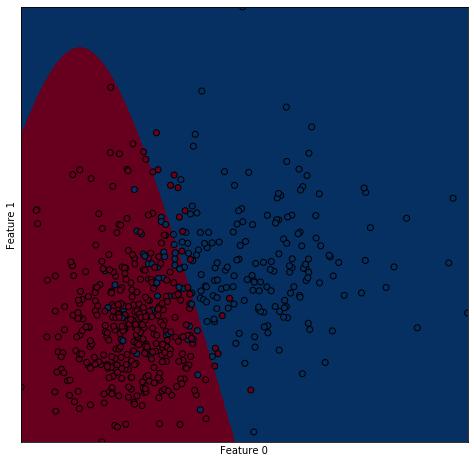

In [7]:
i = 0; j = 1
naive_bayes.fit(X[:, [i, j]], y)
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)
 
x_min, x_max = X[:, i].min(), X[:, i].max()
y_min, y_max = X[:, j].min(), X[:, j].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

y_hat = naive_bayes.predict(np.concatenate((xx.reshape(-1,1), yy.reshape(-1,1)), axis=1))
y_hat = y_hat.reshape(xx.shape)

ax1.pcolormesh(xx, yy, y_hat, cmap=plt.cm.get_cmap('RdBu_r'))
ax1.scatter(X[:, i], X[:, j], c=y, edgecolors='k', cmap=plt.cm.get_cmap('RdBu_r'))
ax1.set_xlabel('Feature '+str(i))
ax1.set_ylabel('Feature '+str(j))
ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.set_xticks(())
ax1.set_yticks(())
plt.show()

## K-nearest neighbours 

K-nearest neighbors (KNN) is a powerful, yet easy to understand machine learning algorithm. In principle, this algorithm works by assigning the majority class of the N closest neighbors to the current data point. As such, absolutely no training is required for the algorithm! All we do is choose K (i.e. the number of neighbors to consider), choose a distance function to calculate proximity and we're good to go. 

A typical KNN algorithm works as follows:

1. Choose K (number of neighbours)
2. Choose distance metric, e.g. Euclidean distance: 
$$
d(X^a,X^b) = \sqrt{(x^{a}_{1}-x^{b}_{1})^2 + (x^{a}_{2}-x^{b}_{2})^2 + \cdots + (x^{a}_{n}-x^{b}_{n})^2}
$$ 
3. For each data point $X_{test}$ in the testing data do:
    - For each data point $X_{train}$ in the training data do
        - Calculate the distance $d(X_{train},X_{test})$ between the test point and training observation.
    - Find labels of the K closest data points to $X_{test}$
    - Assign most frequent (i.e. the mode) class label to $X_{test}$

In the context of regression, we would use the mean of the K nearest neighbors instead of the mode of the class labels.

### Fit the model 

In [8]:
n_neighbors = 3 # <--- change this number to play around with how many nearest neighbours to look for.

knn = KNeighborsClassifier(n_neighbors)
# Fit the model 
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### Assess model performance
Like before, let's have a look at the log loss

In [9]:
# Get predictions on the test set 
y_hat = knn.predict_proba(X_test)
# Calculate the loss 
print("The log loss error for our model is: ", log_loss(y_test, y_hat))

The log loss error for our model is:  0.39532735238898864


Notice that the log loss is higher than it was for the Naive Bayes model. _Why do you think this is the case?_

### Plot the decision boundary

We once again visualise the decision boundary of our KNN classifier. Remember to change `i` and `j` to compare different features to one another. 

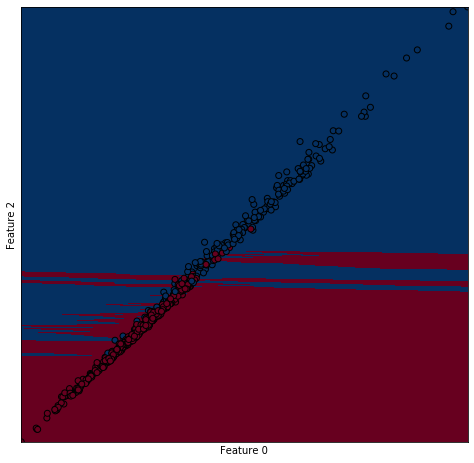

In [10]:
i = 0; j = 2
knn.fit(X[:, [i, j]], y)
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)

x_min, x_max = X[:, i].min(), X[:, i].max()
y_min, y_max = X[:, j].min(), X[:, j].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

y_hat = knn.predict(np.concatenate((xx.reshape(-1,1), yy.reshape(-1,1)), axis=1))
y_hat = y_hat.reshape(xx.shape)

ax1.pcolormesh(xx, yy, y_hat, cmap=plt.cm.get_cmap('RdBu_r'))
ax1.scatter(X[:, i], X[:, j], c=y, edgecolors='k', cmap=plt.cm.get_cmap('RdBu_r'))
ax1.set_xlabel('Feature '+str(i))
ax1.set_ylabel('Feature '+str(j))
ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.set_xticks(())
ax1.set_yticks(())
plt.show()

## Conclusion
In this train we have seen or been formally introduced to:
- Naive bayes classifiers and underlying theory
- The log loss function
- The K Nearest neighbors model
- Visualising decision boundaries